# 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기

In [3]:
cust_df=pd.read_csv('./train_santander.csv',encoding='latin-1')
print('dataset shape:',cust_df.shape)
cust_df.head(3)
#target- 0:만족, 1: 불만족

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


## 데이터 정보

In [5]:
# 1. info()
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [9]:
# 2. 불만족 고객 비율 구하기
print(cust_df['TARGET'].value_counts())

unsatisfied_cnt=cust_df[cust_df['TARGET']==1].TARGET.count() #불만족 고객
total_cnt=cust_df.TARGET.count() #target열의 총 갯수

print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [11]:
# 3. describe()
cust_df.describe() #var3 : null값이 -999999로 되어있음

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [13]:
# 4. var3의 valuecount()
cust_df['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

## 전처리 및 피처/레이블 셋 분리

In [14]:
# 4-1. -9999를 가장 많은 값인 2값으로 대체함
cust_df['var3'].replace(-999999,2,inplace=True)

# 5. ID피처 드롭
cust_df.drop('ID',axis=1,inplace=True)

# 6. 피처셋과 레이블 셋 분리
# 레이블칼럼은 데이터프레임의 맨 마지막에 위치
X_features=cust_df.iloc[:,:-1]
y_labels=cust_df.iloc[:,-1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


## train-test split

### 첫번째 분리

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0,
                                                   stratify=y_labels)#stratify해주면 더 정확
train_cnt=y_train.count()
test_cnt=y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960438
1    0.039562
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.960405
1    0.039595
Name: TARGET, dtype: float64


### 두번째 분리

In [16]:
# early stopping 검증 하기 위해
# X_train, y_train을 다시 학습과 검증 셋으로 분리
X_tr,X_val,y_tr,y_val=train_test_split(X_train,y_train,test_size=0.3,random_state=0)

# XGBoost 모델학습과 하이퍼 파라미터 튜닝

## 튜닝 전 학습/평가

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# 1. 객체 생성
# n_estimators는 500, learning_rate 0.05, random_state는 예제 수행시 마다 동일 예측결과 위해 설정
xgb_clf=XGBClassifier(n_estimators=500,learning_rate=0.05,random_state=156)

# 2. 학습
# 성능평가지표를 auc로, 조기중단 파라미터는 100으로 설정하고 학습
xgb_clf.fit(X_tr,y_tr,early_stopping_rounds=100,eval_metric='auc',
            eval_set=[(X_tr, y_tr), (X_val, y_val)])

# 3. 평가
xgb_roc_score=roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1])

# roc_auc_score는 확률을 가져와야돼서 predict_proba로 함
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83155	validation_1-auc:0.80088
[1]	validation_0-auc:0.83330	validation_1-auc:0.80089
[2]	validation_0-auc:0.83749	validation_1-auc:0.80303
[3]	validation_0-auc:0.83661	validation_1-auc:0.80251
[4]	validation_0-auc:0.83739	validation_1-auc:0.80252
[5]	validation_0-auc:0.83841	validation_1-auc:0.80237
[6]	validation_0-auc:0.84131	validation_1-auc:0.80673
[7]	validation_0-auc:0.84135	validation_1-auc:0.80660
[8]	validation_0-auc:0.84304	validation_1-auc:0.80861
[9]	validation_0-auc:0.84405	validation_1-auc:0.80920
[10]	validation_0-auc:0.84455	validation_1-auc:0.80930
[11]	validation_0-auc:0.84502	validation_1-auc:0.80985
[12]	validation_0-auc:0.84665	validation_1-auc:0.81022
[13]	validation_0-auc:0.84681	validation_1-auc:0.81036
[14]	validation_0-auc:0.84739	validation_1-auc:0.81059
[15]	validation_0-auc:0.84815	validation_1-auc:0.81081
[16]	validation_0-auc:0.84822	validation_1-auc:0.81093
[17]	validation_0-auc:0.85089	validation_1-auc:0.81394
[18]	validation_0-au

[149]	validation_0-auc:0.90719	validation_1-auc:0.83199
[150]	validation_0-auc:0.90729	validation_1-auc:0.83197
[151]	validation_0-auc:0.90735	validation_1-auc:0.83200
[152]	validation_0-auc:0.90741	validation_1-auc:0.83200
[153]	validation_0-auc:0.90790	validation_1-auc:0.83208
[154]	validation_0-auc:0.90807	validation_1-auc:0.83209
[155]	validation_0-auc:0.90811	validation_1-auc:0.83213
[156]	validation_0-auc:0.90827	validation_1-auc:0.83206
[157]	validation_0-auc:0.90876	validation_1-auc:0.83213
[158]	validation_0-auc:0.90900	validation_1-auc:0.83214
[159]	validation_0-auc:0.90926	validation_1-auc:0.83229
[160]	validation_0-auc:0.90930	validation_1-auc:0.83229
[161]	validation_0-auc:0.90942	validation_1-auc:0.83214
[162]	validation_0-auc:0.90957	validation_1-auc:0.83213
[163]	validation_0-auc:0.90999	validation_1-auc:0.83215
[164]	validation_0-auc:0.91004	validation_1-auc:0.83211
[165]	validation_0-auc:0.91023	validation_1-auc:0.83209
[166]	validation_0-auc:0.91030	validation_1-auc:

## hyperopt로 튜닝

### search space 설정

In [18]:
from hyperopt import hp

# max_depth는 5~15까지 1간격으로, min_child_weight는 1~6까지 1간격으로
# colsample_bytree는 0.5~0.95까지, learning_rate는 0.01~0.2까지 정규분포된 값으로 검색
xgb_search_space={'max_depth':hp.quniform('max_depth',5,15,1),
                 'min_child_weight':hp.quniform('min_child_weight',1,6,1),
                 'colsample_bytree':hp.uniform('colsample_bytree',0.5,0.95),
                 'learning_rate':hp.uniform('learning_rate',0.01,0.2)}

### 목적함수 설정

In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# <XGBoost에 earlystopping적용하는 방법: 이전에는 cross_val_score했는데 이거는 조기중단 적용x>
# 목적함수 설정
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차검증 학습 후 -1*roc_auc평균값 반환
def objective_func(search_space):
    # 1. 객체 생성 및 인자 설정
    xgb_clf=XGBClassifier(n_estimators=100,
                         max_depth=int(search_space['max_depth']),
                         min_child_weight=int(search_space['min_child_weight']),
                          colsample_bytree=search_space['colsample_bytree']
                            , learning_rate=search_space['learning_rate']
                         )
    # 2. k-fold 교차검증
    #  2-1. 3개 k-fold방식으로 평가된 roc_auc 지표 담는 list
    roc_auc_list=[]
    
    #  2-2. 3개 k-fold방식 적용
    kf=KFold(n_splits=3)
    #  2-3. X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index,val_index in kf.split(X_train):
        
        # kf.split(X_train)으로 추출된 "학습과 검증 index값"으로 학습과 검증 데이터 세트 분리
        X_tr,y_tr=X_train.iloc[tr_index],y_train.iloc[tr_index]
        X_val,y_val=X_train.iloc[val_index],y_train.iloc[val_index]
        
        # early stopping 설정
        xgb_clf.fit(X_tr,y_tr,early_stopping_rounds=30,eval_metric='auc',
                   eval_set=[(X_tr,y_tr),(X_val,y_val)])
        
        # 1로 예측한 확률값 추출 후 roc auc계산
        score=roc_auc_socre(y_val,xgb_clf.predict_proba(X_val)[:,1])#y_test아님
        
        # list에 결과값 담음(평균 roc auc계산 위해)
        roc_auc_list.append(score)
        
    # 3. roc_auc값의 평균값 반환(3개의 kfold로 계산)
    # (단,hyperopt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환)
    # (= roc_auc는 클수록 좋은데, hyperopt는 최솟값을 찾아야 좋은거니까 -1곱함)
    return -1*np.mean(roc_auc_list)  

### 목적함수의 최소값을 찾는 함수

In [ ]:
from hyperopt import fmin, tpe, Trials

trials=Trials()

# 1. fmin()함수 호출
# max_evals 지정된 횟수만큼 반복 후, 목적함수의 최소값을 가지는 최적 입력값 추출
best=fmin(fn=objective_func,
         space=xgb_search_space,
         algo=tpe.sugget,
         max_evals=50, #최대 반복횟수 지정
         trials=trials,
         rstate=np.random.default_rng(seed=30))

print('best:', best)

## 튜닝 후 학습/평가

In [ ]:
# 1. 객체생성 및 인자설정
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']), 
                        colsample_bytree=round(best['colsample_bytree'], 5)   
                       )
# 2. 학습(early stopping 100으로 설정/evaluation metric을 auc로)
xgb_clf.fit(X_tr,y_tr,early_stopping_rounds=100,
           eval_metric='auc',eval_set=[(X_tr,y_tr),(X_val,y_val)])

# 3. 평가
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

## feature importance 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

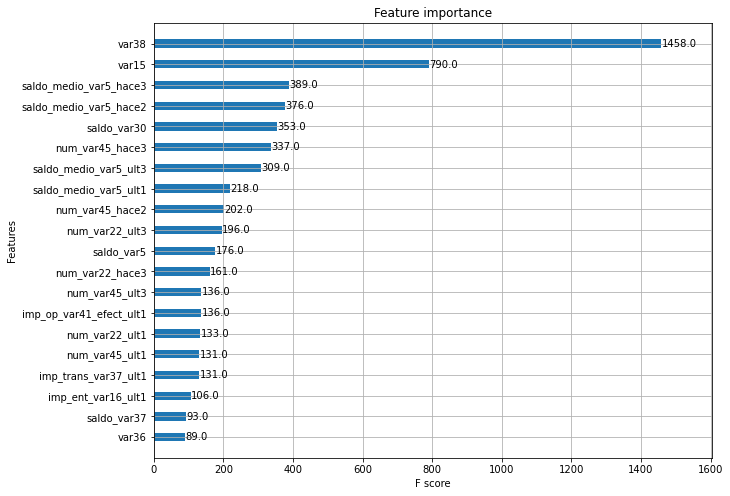

In [22]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

# LightGBM 모델 학습과 하이퍼파라미터 튜닝

- num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf),max_depth를 함께 조정하면서 모델 복잡도를 줄이는 것이 기본 튜닝 방안
- colsample_bytree: 트리 생성에 필요한 피처를 임의 샘플링(과적합 방지)

## 튜닝 전 학습/평가

In [24]:
from lightgbm import LGBMClassifier
# 1. 객체생성
lgbm_clf=LGBMClassifier(n_estimators=500)
# 2. 학습
eval_set=[(X_tr,y_tr),(X_val,y_val)]
lgbm_clf.fit(X_tr,y_tr,early_stopping_rounds=100,
            eval_metric='auc',eval_set=eval_set)
# 3. 평가
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.831406	training's binary_logloss: 0.158826	valid_1's auc: 0.800667	valid_1's binary_logloss: 0.153741
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.836656	training's binary_logloss: 0.152848	valid_1's auc: 0.807013	valid_1's binary_logloss: 0.149353
[3]	training's auc: 0.842189	training's binary_logloss: 0.148374	valid_1's auc: 0.809358	valid_1's binary_logloss: 0.14637
[4]	training's auc: 0.848609	training's binary_logloss: 0.144984	valid_1's auc: 0.812287	valid_1's binary_logloss: 0.143985
[5]	training's auc: 0.854197	training's binary_logloss: 0.142145	valid_1's auc: 0.815641	valid_1's binary_logloss: 0.142136
[6]	training's auc: 0.857482	training's binary_logloss: 0.139711	valid_1's auc: 0.819214	valid_1's binary_logloss: 0.14048
[7]	training's auc: 0.86063	training's binary_logloss: 0.137717	valid_1's auc: 0.821702	valid_1's binary_logloss: 0.139141
[8]	training's auc: 0.862196	training's binary_logloss: 0.136001	valid_1'

[74]	training's auc: 0.930275	training's binary_logloss: 0.105705	valid_1's auc: 0.827374	valid_1's binary_logloss: 0.133055
[75]	training's auc: 0.930548	training's binary_logloss: 0.105542	valid_1's auc: 0.827226	valid_1's binary_logloss: 0.133149
[76]	training's auc: 0.930851	training's binary_logloss: 0.105348	valid_1's auc: 0.827194	valid_1's binary_logloss: 0.133134
[77]	training's auc: 0.931142	training's binary_logloss: 0.105175	valid_1's auc: 0.827189	valid_1's binary_logloss: 0.133143
[78]	training's auc: 0.931471	training's binary_logloss: 0.104944	valid_1's auc: 0.827178	valid_1's binary_logloss: 0.133192
[79]	training's auc: 0.931667	training's binary_logloss: 0.10475	valid_1's auc: 0.826815	valid_1's binary_logloss: 0.13329
[80]	training's auc: 0.931927	training's binary_logloss: 0.104553	valid_1's auc: 0.826955	valid_1's binary_logloss: 0.133277
[81]	training's auc: 0.932408	training's binary_logloss: 0.104358	valid_1's auc: 0.826916	valid_1's binary_logloss: 0.1333
[82]

[142]	training's auc: 0.950401	training's binary_logloss: 0.0939616	valid_1's auc: 0.818958	valid_1's binary_logloss: 0.136473
[143]	training's auc: 0.950512	training's binary_logloss: 0.0938366	valid_1's auc: 0.819075	valid_1's binary_logloss: 0.136471
[144]	training's auc: 0.950581	training's binary_logloss: 0.0937457	valid_1's auc: 0.818719	valid_1's binary_logloss: 0.136574
[145]	training's auc: 0.950648	training's binary_logloss: 0.0936555	valid_1's auc: 0.818635	valid_1's binary_logloss: 0.136595
[146]	training's auc: 0.950688	training's binary_logloss: 0.0935983	valid_1's auc: 0.818605	valid_1's binary_logloss: 0.136604
Early stopping, best iteration is:
[46]	training's auc: 0.9143	training's binary_logloss: 0.113384	valid_1's auc: 0.829614	valid_1's binary_logloss: 0.132247
ROC AUC: 0.8186


## hyperopt로 튜닝

### search space 설정

In [27]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

### 목적함수 설정

In [29]:
def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']), 
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1]) 
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)

### 목적함수의 최소값을 찾는 함수

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출. 
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

## 튜닝 후 학습/평가

In [ ]:
lgbm_clf =  LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                           max_depth=int(best['max_depth']),
                           min_child_samples=int(best['min_child_samples']), 
                           subsample=round(best['subsample'], 5),
                           learning_rate=round(best['learning_rate'], 5)
                          )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))